In [78]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Изучаем данные

In [4]:
df = pd.read_csv("diabetes.data.csv")
df.head()

,times_pregnant,glucose_concentration,diastolic_blood_pressure,triceps_sf_thickness,serum_insulin,bmi,d_pedigree_function,years_of_age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   times_pregnant            768 non-null    int64  
 1   glucose_concentration     768 non-null    int64  
 2   diastolic_blood_pressure  768 non-null    int64  
 3   triceps_sf_thickness      768 non-null    int64  
 4   serum_insulin             768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   d_pedigree_function       768 non-null    float64
 7   years_of_age              768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
times_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps_sf_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum_insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
d_pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
years_of_age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Работа с пропусками

In [9]:
df.isnull().sum()

times_pregnant              0
glucose_concentration       0
diastolic_blood_pressure    0
triceps_sf_thickness        0
serum_insulin               0
bmi                         0
d_pedigree_function         0
years_of_age                0
diabetes                    0
dtype: int64

In [10]:
df.isna().sum()

times_pregnant              0
glucose_concentration       0
diastolic_blood_pressure    0
triceps_sf_thickness        0
serum_insulin               0
bmi                         0
d_pedigree_function         0
years_of_age                0
diabetes                    0
dtype: int64

## Работа с выбросами/пропусками

In [12]:
df_1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [14]:
df_1.shape

(688, 9)

## Ответы на вопросы

1. Количество наблюдений в каждой целевой группе

In [30]:
df_1.groupby("diabetes")["times_pregnant"].count()

diabetes
0    461
1    227
Name: times_pregnant, dtype: int64

2. Количество наблюдений по признаку times_pregnant и средний уровень глюкозы в крови(glucose_concentration)

In [44]:
df_1.rename(columns={'bmi':'number of observations','glucose_concentration':'mean_glucose_concentration'}).groupby("times_pregnant").agg({"number of observations":"count","mean_glucose_concentration":"mean"})

,number of observations,mean_glucose_concentration
times_pregnant,,
0,91,119.934066
1,127,113.291339
2,89,108.617978
3,69,122.652174
4,63,123.190476
5,53,119.849057
6,46,124.760870
7,41,138.390244
8,32,130.718750


3. Сколько наблюдений у которых целевой признак 0, уровень глюкозы больше 120 и возраст менее 30

In [49]:
df_1[((df_1['diabetes'] == 0) & (df_1['glucose_concentration'] > 120)) & (df_1['years_of_age'] < 30)]["times_pregnant"].count()


73

## Визуализации

1. Гистограмма целевого признака

<AxesSubplot:xlabel='diabetes', ylabel='count'>

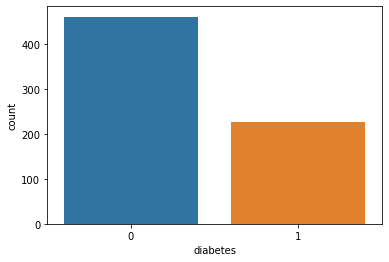

In [114]:
sns.countplot(x="diabetes", data=df_1)

2. Распределение возраста в разбивке по целевому признаку

<AxesSubplot:xlabel='years_of_age', ylabel='times_pregnant'>

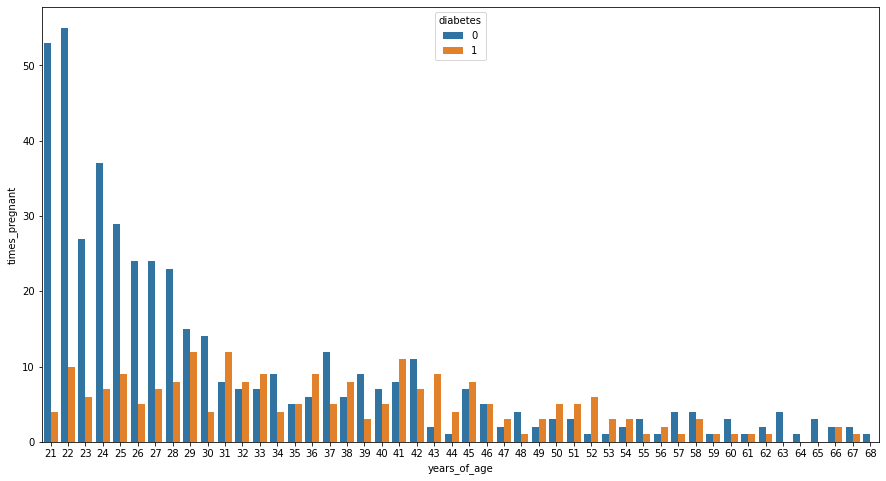

In [81]:
a = df_1.groupby(["diabetes","years_of_age"]).agg({"times_pregnant":"count"}).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(data=a, x='years_of_age', y='times_pregnant', hue='diabetes')

3. Сколько наблюдений в каждой целевой группе по признаку times_pregnant?

<AxesSubplot:xlabel='times_pregnant', ylabel='bmi'>

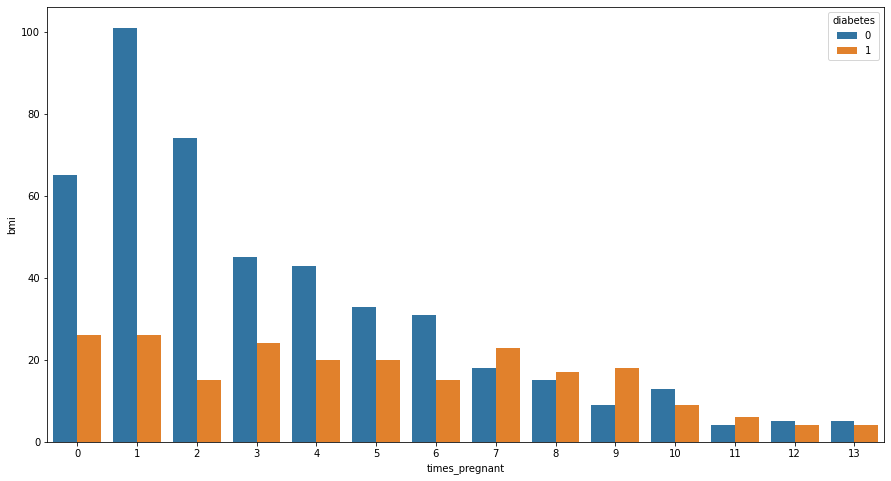

In [84]:
b = df_1.groupby(["diabetes","times_pregnant"]).agg({"bmi":"count"}).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(data=b, x='times_pregnant', y='bmi', hue='diabetes')

4. Вывести график зависимости возраста и уровня глюкозы

<AxesSubplot:xlabel='glucose_concentration'>

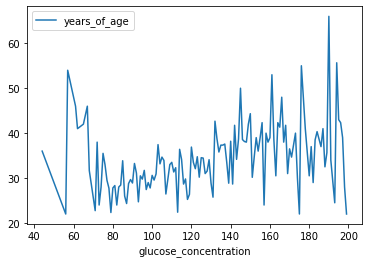

In [170]:
c=df_1.groupby("glucose_concentration").agg({"years_of_age":"mean"}).sort_values(by='glucose_concentration').reset_index()
c.plot(x="glucose_concentration", y="years_of_age")

5. Вывести графики зависимости возраста от индекса массы тела(BMI) по ключевому признаку в одних осях

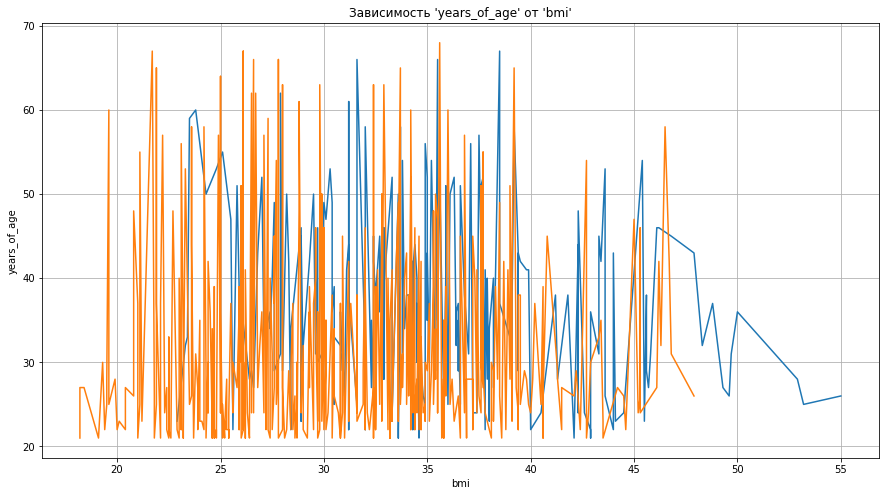

In [174]:
df_1=df_1.sort_values(by='bmi')
df_1_1=df_1[df_1["diabetes"]==1].loc[:,["bmi","years_of_age"]]
df_1_2=df_1[df_1["diabetes"]==0].loc[:,["bmi","years_of_age"]]
plt.figure(figsize=(15,8))
plt.title("Зависимость 'years_of_age' от 'bmi'")
plt.xlabel("bmi")
plt.ylabel("years_of_age")
plt.grid() 
plt.plot(df_1_1["bmi"], df_1_1["years_of_age"])
plt.plot(df_1_2["bmi"], df_1_2["years_of_age"])
plt.show()

## Создание модели

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [134]:
X = df_1.drop(['diabetes'], axis=1)
y = df_1['diabetes']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [136]:
model = LogisticRegression()

In [150]:
model.fit(X_train, y_train)

C:\Users\IProkopyev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [151]:
result = model.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_test, result)

0.8260869565217391

In [153]:
model.score(X_test,y_test)

0.8260869565217391

In [ ]:
Метод score дает среднюю оценку всех критериев оценки для данной модели.

In [217]:
df_1_3=df_1[df_1["diabetes"]==1]
columns=df_1_3.columns
print("Портрет типичного больного сахарным диабетом:\n")
for i in range(df_1_3.shape[1]-1):
    print(f"{columns[i]}={df_1_3.iloc[:,i].mean()}")


Портрет типичного больного сахарным диабетом:

times_pregnant=4.903083700440528
glucose_concentration=140.7444933920705
diastolic_blood_pressure=75.54625550660793
triceps_sf_thickness=22.030837004405285
serum_insulin=86.62995594713657
bmi=35.018502202643184
d_pedigree_function=0.5412114537444936
years_of_age=37.1057268722467
